In [4]:
# import libraries
from langdetect import detect
from deep_translator import GoogleTranslator
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import contractions
import yake
from rake_nltk import Rake
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [5]:
data = pd.read_csv('dataset_es_train.csv',on_bad_lines='skip',engine='python')
data.head(2)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_es_train.csv'

In [3]:
sample = data.sample(1000)
sample.reset_index(drop = True,inplace = True)

In [4]:
sample

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0560800,product_es_0055067,reviewer_es_0981936,5,Muy útil para el coche y con buena adherencia ...,Soporte barato y fuerte,es,wireless
1,es_0620736,product_es_0257722,reviewer_es_0805048,5,Mejor de lo que pensaba!!! Muy cómodo. No sé n...,Increíble,es,furniture
2,es_0994142,product_es_0254995,reviewer_es_0064836,4,Por lo general funciona bien pero hay que pone...,La información que ofrece es bastante completa,es,lawn_and_garden
3,es_0872022,product_es_0074012,reviewer_es_0206415,2,Me gusta que calienta y mantiene la temperatur...,.....,es,kitchen
4,es_0923378,product_es_0172183,reviewer_es_0212871,3,LO MEJOR : Tener completa una de las series de...,Recuerdos con grano,es,other
...,...,...,...,...,...,...,...,...
995,es_0709726,product_es_0861909,reviewer_es_0391955,2,Mochila made in china/taiwan con calidades muy...,Mochila normalita,es,pc
996,es_0626797,product_es_0086381,reviewer_es_0747419,1,Después de una hora y media o así de poner mús...,Nos ha quemado el mechero del coche,es,wireless
997,es_0942542,product_es_0445241,reviewer_es_0839479,5,Necesitaba algo así para mi moto porque no ten...,Seguridad,es,home_improvement
998,es_0625451,product_es_0069797,reviewer_es_0370610,1,No quería creer lo que leía en el resto de com...,Calidad muy pobre,es,shoes


In [5]:
data = sample[['review_body','stars']]
data

,review_body,stars
0,Muy útil para el coche y con buena adherencia ...,5
1,Mejor de lo que pensaba!!! Muy cómodo. No sé n...,5
2,Por lo general funciona bien pero hay que pone...,4
3,Me gusta que calienta y mantiene la temperatur...,2
4,LO MEJOR : Tener completa una de las series de...,3
...,...,...
995,Mochila made in china/taiwan con calidades muy...,2
996,Después de una hora y media o así de poner mús...,1
997,Necesitaba algo así para mi moto porque no ten...,5
998,No quería creer lo que leía en el resto de com...,1


In [6]:
def lang_detect(data):
    lang = detect(data)
    return lang

In [8]:
print(data.review_body[0])
lang_detect(data.review_body[0])

Muy útil para el coche y con buena adherencia magnetica


'es'

In [11]:
data['language'] = data.review_body.apply(lang_detect)
data

,review_body,stars,language
0,Muy útil para el coche y con buena adherencia ...,5,es
1,Mejor de lo que pensaba!!! Muy cómodo. No sé n...,5,es
2,Por lo general funciona bien pero hay que pone...,4,es
3,Me gusta que calienta y mantiene la temperatur...,2,es
4,LO MEJOR : Tener completa una de las series de...,3,es
...,...,...,...
995,Mochila made in china/taiwan con calidades muy...,2,es
996,Después de una hora y media o así de poner mús...,1,es
997,Necesitaba algo así para mi moto porque no ten...,5,es
998,No quería creer lo que leía en el resto de com...,1,es


In [12]:
def lang_trans(data):
    translator = GoogleTranslator()
    corrected_text = translator.translate(data)
    return corrected_text

In [14]:
print(data.review_body[0])
lang_trans(data.review_body[0])

Muy útil para el coche y con buena adherencia magnetica


'Very useful for the car and with good magnetic adhesion'

In [17]:
data['translated_review'] = data.review_body.apply(lang_trans)
data

,review_body,stars,language,translated_review
0,Muy útil para el coche y con buena adherencia ...,5,es,Very useful for the car and with good magnetic...
1,Mejor de lo que pensaba!!! Muy cómodo. No sé n...,5,es,Better than I thought!!! Very comfortable. I d...
2,Por lo general funciona bien pero hay que pone...,4,es,It usually works fine but you have to put the ...
3,Me gusta que calienta y mantiene la temperatur...,2,es,I like that it heats and maintains the tempera...
4,LO MEJOR : Tener completa una de las series de...,3,es,THE BEST: Having one of the series from our ch...
...,...,...,...,...
995,Mochila made in china/taiwan con calidades muy...,2,es,Backpack made in China/Taiwan with very fair q...
996,Después de una hora y media o así de poner mús...,1,es,After an hour and a half or so of playing musi...
997,Necesitaba algo así para mi moto porque no ten...,5,es,I needed something like this for my motorcycle...
998,No quería creer lo que leía en el resto de com...,1,es,I didn't want to believe what I read in the re...


In [19]:
data.language.value_counts()

language
es    982
pt      9
ca      3
it      3
en      2
so      1
Name: count, dtype: int64

In [24]:
def ngram_extractor(data,ngram_range):
    tokens = word_tokenize(data)
    ngram = ngrams(tokens,ngram_range)
    ngram_list = []
    for ngram1 in ngram:
        ngram_list.append(" ".join(ngram1))
    return ngram_list

In [25]:
list_unigram = data.translated_review.apply(lambda x : ngram_extractor(x,1))
list_unigram

0      [Very, useful, for, the, car, and, with, good,...
1      [Better, than, I, thought, !, !, !, Very, comf...
2      [It, usually, works, fine, but, you, have, to,...
3      [I, like, that, it, heats, and, maintains, the...
4      [THE, BEST, :, Having, one, of, the, series, f...
                             ...                        
995    [Backpack, made, in, China/Taiwan, with, very,...
996    [After, an, hour, and, a, half, or, so, of, pl...
997    [I, needed, something, like, this, for, my, mo...
998    [I, did, n't, want, to, believe, what, I, read...
999    [I, expected, it, differently, ,, but, we, wil...
Name: translated_review, Length: 1000, dtype: object

In [27]:
final_unigram = []
for unigram in list_unigram:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt

[('.', 1632),
 ('the', 1626),
 (',', 1469),
 ('it', 1336),
 ('I', 948),
 ('and', 878),
 ('is', 789),
 ('to', 691),
 ('a', 683),
 ('that', 408),
 ('not', 394),
 ('of', 390),
 ('It', 384),
 ('very', 370),
 ('for', 362),
 ("n't", 344),
 ('The', 305),
 ('in', 303),
 ('but', 299),
 ('have', 286),
 ('with', 265),
 ('good', 241),
 ('they', 224),
 ('are', 209),
 ("'s", 191)]

In [34]:
def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

stopword_list = stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("nor")
stopword_list.remove("not")


def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

In [35]:
clean_text = data.translated_review.apply(expand_text)
clean_text = clean_text.apply(clean_data)

In [36]:
clean_text

0                [useful, car, good, magnetic, adhesion]
1      [better, thought, comfortable, not, know, noti...
2      [usually, works, fine, put, external, sensor, ...
3      [like, heats, maintains, temperature, not, lik...
4      [best, one, series, childhood, complete, worst...
                             ...                        
995    [backpack, made, fair, qualities, quite, large...
996    [hour, half, playing, music, working, great, c...
997    [needed, something, like, motorcycle, way, ins...
998    [not, want, believe, read, rest, comments, buy...
999                         [expected, differently, use]
Name: translated_review, Length: 1000, dtype: object

In [37]:
list_unigrams = clean_text.apply(lambda x : ngram_extractor(" ".join(x),1))
final_unigram = []
for unigram in list_unigrams:
    final_unigram.extend(unigram)
cnt = Counter(final_unigram).most_common(25)
cnt

[('not', 755),
 ('good', 293),
 ('product', 138),
 ('quality', 132),
 ('one', 128),
 ('well', 124),
 ('price', 110),
 ('like', 104),
 ('arrived', 94),
 ('use', 90),
 ('little', 87),
 ('time', 86),
 ('perfect', 69),
 ('bought', 68),
 ('much', 64),
 ('works', 61),
 ('bad', 60),
 ('since', 59),
 ('would', 59),
 ('small', 58),
 ('although', 57),
 ('without', 57),
 ('case', 56),
 ('lot', 52),
 ('quite', 52)]

In [39]:
list_bigrams = clean_text.apply(lambda x : ngram_extractor(" ".join(x),2))
final_bigram = []
for bigram in list_bigrams:
    final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt

[('good quality', 42),
 ('not like', 31),
 ('not recommend', 26),
 ('not work', 26),
 ('would not', 21),
 ('good price', 21),
 ('not even', 20),
 ('not know', 19),
 ('poor quality', 18),
 ('not bad', 16),
 ('not fit', 15),
 ('long time', 14),
 ('product not', 13),
 ('not received', 13),
 ('good product', 13),
 ('value money', 13),
 ('works well', 13),
 ('good purchase', 12),
 ('could not', 12),
 ('not give', 12),
 ('price not', 11),
 ('price good', 11),
 ('not able', 11),
 ('quite good', 11),
 ('not buy', 10)]

In [40]:
list_trigram = clean_text.apply(lambda x : ngram_extractor(" ".join(x),3))
final_bigram = []
for bigram in list_trigram:
    final_bigram.extend(bigram)
cnt = Counter(final_bigram).most_common(25)
cnt

[('good value money', 10),
 ('price not ask', 7),
 ('would not buy', 6),
 ('not fit well', 6),
 ('not good quality', 5),
 ('still not received', 5),
 ('yes yes yes', 5),
 ('lasts long time', 4),
 ('not make noise', 4),
 ('not arrived yet', 4),
 ('arrived super fast', 3),
 ('error server error', 3),
 ('server error error', 3),
 ('error error please', 3),
 ('error please try', 3),
 ('please try know', 3),
 ('good quality good', 3),
 ('not received product', 3),
 ('not stick well', 3),
 ('not know not', 3),
 ('not received yet', 3),
 ('price good purchase', 3),
 ('leaves lot desired', 3),
 ('product seems good', 3),
 ('performs function perfectly', 3)]

In [41]:
test = data[(data.stars.astype('int')<3)]
test

,review_body,stars,language,translated_review
3,Me gusta que calienta y mantiene la temperatur...,2,es,I like that it heats and maintains the tempera...
7,TARDA MUCHO EN ESTABILIZAR LA LECTURA DE LA TE...,2,pt,IT TAKES A LONG TIME TO STABILIZE THE REAL TEM...
8,Solo sirve para ver fotos y vídeos hechos con ...,2,es,It is only used to view photos and videos take...
11,los añadidos de otros colores y salientes se v...,2,es,The additions of other colors and projections ...
12,Pensaba que había dado en el clavo con estos p...,2,es,I thought I had hit the nail on the head with ...
...,...,...,...,...
992,No lubrica mucho es muy acuoso y desaparece ra...,2,es,"It doesn't lubricate much, it's very watery an..."
995,Mochila made in china/taiwan con calidades muy...,2,es,Backpack made in China/Taiwan with very fair q...
996,Después de una hora y media o así de poner mús...,1,es,After an hour and a half or so of playing musi...
998,No quería creer lo que leía en el resto de com...,1,es,I didn't want to believe what I read in the re...


In [42]:
clean_text = test.translated_review.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigram = clean_text.apply(lambda x : ngram_extractor(" ".join(x),3))
final_trigram = []
for trigram in list_trigram:
    final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt

[('still not received', 5),
 ('would not buy', 4),
 ('not arrived yet', 4),
 ('not good quality', 4),
 ('not fit well', 4),
 ('not received product', 3),
 ('not received yet', 3),
 ('poor quality price', 3),
 ('not even last', 3),
 ('product perfect fits', 2),
 ('waiting two months', 2),
 ('give one star', 2),
 ('not like not', 2),
 ('not know not', 2),
 ('months still not', 2),
 ('makes lot noise', 2),
 ('received yet not', 2),
 ('not return not', 2),
 ('bad not recommended', 2),
 ('want money back', 2),
 ('started smell burnt', 2),
 ('leaves lot desired', 2),
 ('ago still not', 2),
 ('put collar dog', 2),
 ('order never arrived', 2)]

In [43]:
test = data[data.stars.astype('int')>3]
test

,review_body,stars,language,translated_review
0,Muy útil para el coche y con buena adherencia ...,5,es,Very useful for the car and with good magnetic...
1,Mejor de lo que pensaba!!! Muy cómodo. No sé n...,5,es,Better than I thought!!! Very comfortable. I d...
2,Por lo general funciona bien pero hay que pone...,4,es,It usually works fine but you have to put the ...
9,Una lampara muy buena de estilo industrial. Pe...,4,es,A very good industrial style lamp. Perfect for...
10,Pedido entregado super rápido y eso que ponía ...,5,es,Order delivered super fast and that was one or...
...,...,...,...,...
984,"Era para una regalo y le encantó, es tal cual ...",5,es,"It was for a gift and she loved it, it is just..."
986,Lo he comprado para desmontarlo e instalarlo e...,5,es,I bought it to dismantle it and install it on ...
989,A mi hija le encanto,5,es,My daughter loved it
993,He tenido otros que he tenido que devolver por...,5,es,I have had others that I have had to return du...


In [44]:
clean_text = test.translated_review.apply(expand_text)
clean_text = clean_text.apply(clean_data)
list_trigrams = clean_text.apply(lambda x : ngram_extractor(" ".join(x),3))
final_trigram = []
for trigram in list_trigrams:
    final_trigram.extend(trigram)
cnt = Counter(final_trigram).most_common(25)
cnt

[('good value money', 7),
 ('lasts long time', 4),
 ('arrived super fast', 3),
 ('good quality good', 3),
 ('not make noise', 3),
 ('price good purchase', 3),
 ('price not ask', 3),
 ('performs function perfectly', 3),
 ('good price quality', 3),
 ('not give stars', 3),
 ('long time already', 2),
 ('product quality price', 2),
 ('price without doubt', 2),
 ('seller good quality', 2),
 ('quite good although', 2),
 ('perfect fast shipping', 2),
 ('good quality fast', 2),
 ('good quality materials', 2),
 ('price would buy', 2),
 ('good product quality', 2),
 ('little difficult put', 2),
 ('fits perfectly good', 2),
 ('perfectly good quality', 2),
 ('old daughter loves', 2),
 ('good quality not', 2)]

In [45]:
def wordcloud(data,column):
    df_ = data[column].str.cat(sep = " ")
    wordcloud = WordCloud(width = 700,height = 500,background_color='white').generate(df_)
    plt.figure(figsize = (10,16))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

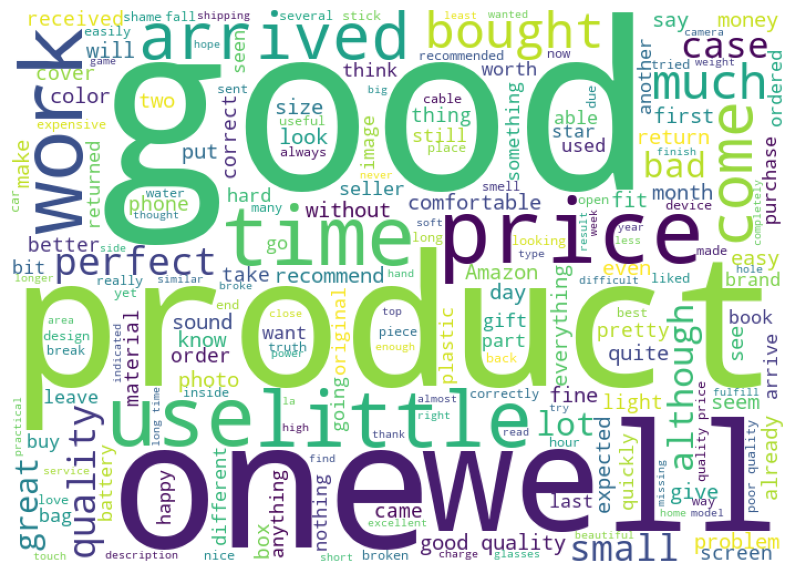

In [48]:
wordcloud(data,"translated_review")

In [49]:
def yake_extractor(data):
    keyword_extractor = yake.KeywordExtractor()
    keywords = keyword_extractor.extract_keywords(data)
    keyword_list = []
    for kw in keywords:
        keyword_list.append(kw[0])
    return keyword_list

keywords = data.translated_review.apply(yake_extractor)
keywords

0      [good magnetic adhesion, magnetic adhesion, go...
1      [thought, price, Excellent quality, comfortabl...
2      [weather station, works fine, put the external...
3      [maintains the temperature, heats and maintain...
4      [childhood complete, remembered in Spain, Spai...
                             ...                        
995    [made in China, Backpack made, fair qualities,...
996    [car cigarette lighter, cigarette lighter burn...
997    [big cities, insure my motorcycle, motorcycle,...
998    [product, size, Buy the product, Chinese imita...
999     [expected it differently, differently, expected]
Name: translated_review, Length: 1000, dtype: object

In [51]:
all_keywords = []
for kw in keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(100)
cnt

[('good', 174),
 ('quality', 119),
 ('product', 113),
 ('price', 98),
 ('arrived', 79),
 ('time', 67),
 ('bought', 58),
 ('small', 48),
 ('Good', 48),
 ('works', 44),
 ('lot', 43),
 ('bad', 43),
 ('perfect', 42),
 ('great', 39),
 ('case', 38),
 ('put', 37),
 ('good quality', 36),
 ('recommend', 36),
 ('fine', 35),
 ('work', 35),
 ('expected', 34),
 ('comfortable', 33),
 ('money', 30),
 ('Amazon', 29),
 ('return', 28),
 ('give', 28),
 ('size', 27),
 ('perfectly', 27),
 ('received', 27),
 ('purchase', 26),
 ('box', 26),
 ('problem', 26),
 ('buy', 24),
 ('pretty', 24),
 ('fit', 24),
 ('long', 23),
 ('months', 23),
 ('photo', 23),
 ('light', 22),
 ('fast', 21),
 ('phone', 21),
 ('easy', 21),
 ('color', 21),
 ('shipping', 21),
 ('quickly', 20),
 ('order', 20),
 ('screen', 20),
 ('seller', 20),
 ('fits', 20),
 ('day', 20),
 ('broken', 19),
 ('thing', 19),
 ('hard', 19),
 ('worth', 18),
 ('battery', 18),
 ('cover', 18),
 ('gift', 18),
 ('sound', 18),
 ('ordered', 18),
 ('plastic', 18),
 ('Per

In [56]:
# rake extracter
def rake_extracter(data):
  keyword_extractor = Rake()
  keyword_extractor.extract_keywords_from_text(data)
  return keyword_extractor.get_ranked_phrases()

rake_keywords = data.translated_review.apply(rake_extracter)
rake_keywords

0                  [good magnetic adhesion, useful, car]
1      [excellent quality, thought !!!, !!!, price, p...
2      [usually works fine, external sensor near, wea...
3      [every time, temperature, separate, program, m...
4      [9 image instead, song remembered, latin audio...
                             ...                        
995    [quite large, fair qualities, backpack made, t...
996    [car cigarette lighter burned, maximum usage t...
997    [needed something like, highly recommended, gl...
998    [already investigated clear signs online, imit...
999                         [use, expected, differently]
Name: translated_review, Length: 1000, dtype: object

In [57]:
all_keywords = []
for kw in rake_keywords:
    all_keywords.extend(kw)
cnt = Counter(all_keywords).most_common(100)
cnt

[('good', 87),
 ('price', 77),
 ('product', 73),
 ('one', 71),
 ('use', 67),
 ('like', 57),
 ('bought', 52),
 ('lot', 50),
 ('perfect', 45),
 ('put', 42),
 ('although', 42),
 ('good quality', 42),
 ('well', 41),
 ('arrived', 39),
 ('recommend', 39),
 ('comfortable', 38),
 ('case', 38),
 ('see', 38),
 ('time', 37),
 ('bad', 33),
 ('know', 32),
 ('return', 32),
 ('give', 32),
 ('expected', 31),
 ('since', 31),
 ('money', 31),
 ('fine', 31),
 ('easy', 30),
 ('quality', 29),
 ('much', 28),
 ('able', 26),
 ('work', 26),
 ('say', 26),
 ('small', 24),
 ('great', 23),
 ('works', 23),
 ('photo', 23),
 ('problem', 23),
 ('buy', 22),
 ('returned', 22),
 ('received', 22),
 ('comes', 22),
 ('amazon', 22),
 ('little', 22),
 ('phone', 21),
 ('pretty', 21),
 ('box', 20),
 ('used', 19),
 ('want', 19),
 ('seen', 19),
 ('would', 19),
 ('think', 18),
 ('looking', 18),
 ('size', 17),
 ('happy', 17),
 ('...', 17),
 ('going', 17),
 ('correct', 17),
 ('worth', 17),
 ('gift', 17),
 ('truth', 17),
 ('also', 16)

In [59]:
def remove_spaces(data):
    clean_text = data.replace("\\n",' ').replace("\t"," ").replace("\\",' ')
    return clean_text

def expand_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

def handling_accented(data):
    fixed_text = unidecode(data)
    return fixed_text


stopword_list = stopwords.words("english")
stopword_list.remove("no")
stopword_list.remove("not")
stopword_list.remove("nor")

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and (word.lower() not in stopword_list) and (len(word)>2) and (word.isalpha())]
    return clean_text

def autocorrection(data):
    spell = Speller(lang = 'en')
    corrected_text = spell(data)
    return corrected_text

def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_data = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_data.append(lemmatized_word)
    return ' '.join(final_data)


In [60]:
clean_text_train = data.translated_review.apply(remove_spaces)
clean_text_train = clean_text_train.apply(expand_text)
clean_text_train = clean_text_train.apply(handling_accented)
clean_text_train = clean_text_train.apply(clean_data)
clean_text_train = clean_text_train.apply(lemmatization)

In [61]:
clean_text_train

0                      useful car good magnetic adhesion
1      better thought comfortable not know notice per...
2      usually work fine put external sensor near wea...
3      like heat maintains temperature not like every...
4      best one series childhood complete worst grain...
                             ...                        
995    backpack made fair quality quite large not loo...
996    hour half playing music working great car ciga...
997    needed something like motorcycle way insure mo...
998    not want believe read rest comment buy product...
999                             expected differently use
Name: translated_review, Length: 1000, dtype: object

In [62]:
count = CountVectorizer()
bow = count.fit_transform(clean_text_train)
pd.DataFrame(bow.toarray(),columns=count.get_feature_names_out())

,able,absolute,absorbs,absurd,acceptable,accessory,according,accordion,account,achieve,...,yellow,yes,yesterday,yet,young,zero,zip,zipper,zoggs,zoogs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(clean_text_train)
pd.DataFrame(tfidf.toarray(),columns=tfidf_vect.get_feature_names_out())

,able,absolute,absorbs,absurd,acceptable,accessory,according,accordion,account,achieve,...,yellow,yes,yesterday,yet,young,zero,zip,zipper,zoggs,zoogs
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.066455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
sent = clean_text_train.tolist()
splitted_sent = [sen.split() for sen in sent]
splitted_sent

[['useful', 'car', 'good', 'magnetic', 'adhesion'],
 ['better',
  'thought',
  'comfortable',
  'not',
  'know',
  'notice',
  'person',
  'movement',
  'excellent'],
 ['usually',
  'work',
  'fine',
  'put',
  'external',
  'sensor',
  'near',
  'weather',
  'station'],
 ['like',
  'heat',
  'maintains',
  'temperature',
  'not',
  'like',
  'every',
  'time',
  'separate',
  'jug',
  'base',
  'not',
  'memorized',
  'program'],
 ['best',
  'one',
  'series',
  'childhood',
  'complete',
  'worst',
  'grain',
  'dvd',
  'image',
  'instead',
  'original',
  'clarification',
  'first',
  'season',
  'song',
  'remembered',
  'spain',
  'not',
  'appear',
  'included',
  'later',
  'latin',
  'audio',
  'first',
  'season',
  'spanish',
  'end',
  'series',
  'saw',
  'spain'],
 ['different', 'tripod', 'usual', 'weighs', 'lot', 'performance'],
 ['arrived',
  'couple',
  'crack',
  'hinge',
  'undone',
  'since',
  'stick',
  'hinge',
  'fell',
  'size',
  'expected',
  'wider',
  'want

In [65]:
word_2vec_model =Word2Vec(splitted_sent,min_count=2,window=3)

In [81]:
#document numerical format

def vectorizer(list_of_docs,model):
  feature = []
  for rew in list_of_docs:
    zero_vector = np.zeros(model.vector_size)
    vectors = []
    for word in rew:
      try:
        word in model.wv
        vectors.append(model.wv[word]) #model.wv['good']
      except KeyError:
        continue
    if vectors:
      vectors = np.array(vectors)
      avg_vec = vectors.mean(axis=0)
      feature.append(avg_vec)
    else:
      feature.append(zero_vector)
  return feature

In [82]:
vectorized_docs = vectorizer(splitted_sent,word_2vec_model)
vectorized_docs

[array([-0.01999146,  0.03522262, -0.00174945,  0.00362082,  0.01109974,
        -0.05655488,  0.00511441,  0.0660706 , -0.01954255, -0.01974027,
        -0.02115435, -0.05279095, -0.02028187,  0.019741  ,  0.0036065 ,
        -0.02565713,  0.00575365, -0.0408516 , -0.00433331, -0.06095193,
         0.01683731,  0.02361901,  0.01718419, -0.01159137,  0.00335411,
        -0.00336285, -0.01584027, -0.02047693, -0.02358755,  0.00192716,
         0.03022509,  0.01301973,  0.01036093, -0.02011967, -0.012775  ,
         0.02883234,  0.00390169, -0.02354936, -0.01495507, -0.05378412,
         0.0037826 , -0.01486551, -0.01025374, -0.00793233,  0.01784462,
        -0.00934999, -0.00996193, -0.00276149,  0.0164776 ,  0.02292973,
         0.01147551, -0.0292303 , -0.00791133, -0.00071047, -0.01316769,
         0.0095513 ,  0.02369592, -0.00821608, -0.03710134,  0.01507572,
         0.00674167,  0.00894761, -0.00172862, -0.01645151, -0.0428928 ,
         0.02051288,  0.01560919,  0.02048024, -0.0

In [83]:
vectorized_docs[0]

array([-0.01999146,  0.03522262, -0.00174945,  0.00362082,  0.01109974,
       -0.05655488,  0.00511441,  0.0660706 , -0.01954255, -0.01974027,
       -0.02115435, -0.05279095, -0.02028187,  0.019741  ,  0.0036065 ,
       -0.02565713,  0.00575365, -0.0408516 , -0.00433331, -0.06095193,
        0.01683731,  0.02361901,  0.01718419, -0.01159137,  0.00335411,
       -0.00336285, -0.01584027, -0.02047693, -0.02358755,  0.00192716,
        0.03022509,  0.01301973,  0.01036093, -0.02011967, -0.012775  ,
        0.02883234,  0.00390169, -0.02354936, -0.01495507, -0.05378412,
        0.0037826 , -0.01486551, -0.01025374, -0.00793233,  0.01784462,
       -0.00934999, -0.00996193, -0.00276149,  0.0164776 ,  0.02292973,
        0.01147551, -0.0292303 , -0.00791133, -0.00071047, -0.01316769,
        0.0095513 ,  0.02369592, -0.00821608, -0.03710134,  0.01507572,
        0.00674167,  0.00894761, -0.00172862, -0.01645151, -0.0428928 ,
        0.02051288,  0.01560919,  0.02048024, -0.03955033,  0.02

In [84]:
x_emb = np.array(vectorized_docs)
x_emb

array([[-0.01999146,  0.03522262, -0.00174945, ..., -0.03040629,
         0.00724201, -0.00470449],
       [-0.02217085,  0.04549023,  0.005803  , ..., -0.04420072,
         0.00974092, -0.0059773 ],
       [-0.01175699,  0.01920555,  0.00253574, ..., -0.02257953,
         0.00591532, -0.00963429],
       ...,
       [-0.01430601,  0.0282052 ,  0.00641793, ..., -0.02535028,
         0.00918817, -0.00657385],
       [-0.01987333,  0.04032265,  0.00486918, ..., -0.03777095,
         0.01207058, -0.00761779],
       [-0.0200455 ,  0.05790358,  0.00275675, ..., -0.04368073,
         0.0122189 , -0.01350807]], dtype=float32)

In [85]:
def build_kmeans(clusters,data):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [86]:
kmeans_model_count, count_pred = build_kmeans(3,bow)


In [87]:
count_pred

array([2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2,
       0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,

In [88]:
kmeans_model_tfidf, tfidf_model = build_kmeans(3,tfidf)

In [89]:
tfidf_model

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1,
       1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [90]:
kmeans_model_word2vec,word2vec_pred = build_kmeans(3,x_emb)

In [91]:
word2vec_pred

array([2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 2, 2, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2,
       2, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2,

In [92]:
print(f"Silhouette score with kmeans-count : {silhouette_score(bow,count_pred)}")

Silhouette score with kmeans-count : 0.12878630074162392


In [95]:
print(f"Silhouette score with kmeans-tfidf : {silhouette_score(tfidf,tfidf_model)}")

Silhouette score with kmeans-tfidf : 0.005819350221111327


In [96]:
print(f"Silhouette score with kmeans-word2vec : {silhouette_score(x_emb,word2vec_pred)}")

Silhouette score with kmeans-word2vec : 0.47557494044303894


In [97]:
def visualize_silhouette(data,model,title1):
  print(f"Silhouette Visualizer for {title1}")
  visualizer = SilhouetteVisualizer(model,colors="yellowbrick")
  visualizer.fit(data)
  visualizer.show()

Silhouette Visualizer for Kmeans - count vectoriser


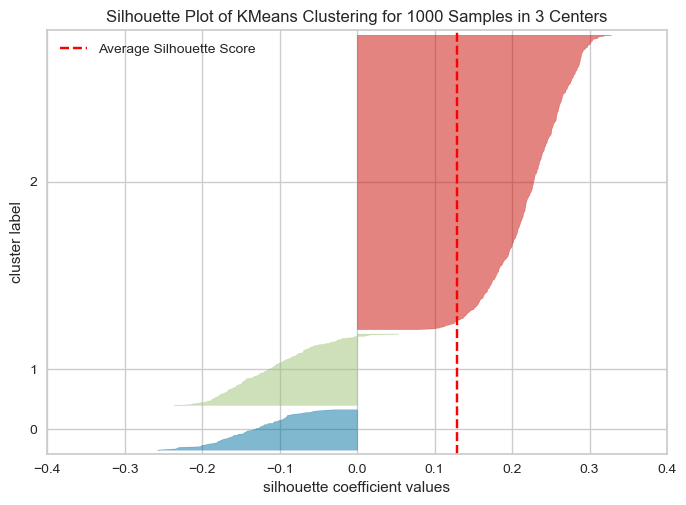

In [98]:
visualize_silhouette(bow,kmeans_model_count,'Kmeans - count vectoriser')

Silhouette Visualizer for Kmeans -tfidf vectorizer


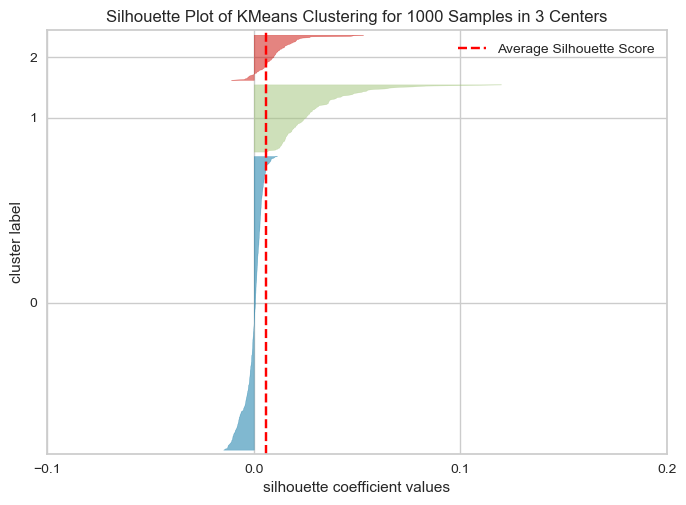

In [99]:
visualize_silhouette(tfidf,kmeans_model_tfidf,'Kmeans -tfidf vectorizer')

Silhouette Visualizer for Kmeans - word2vec


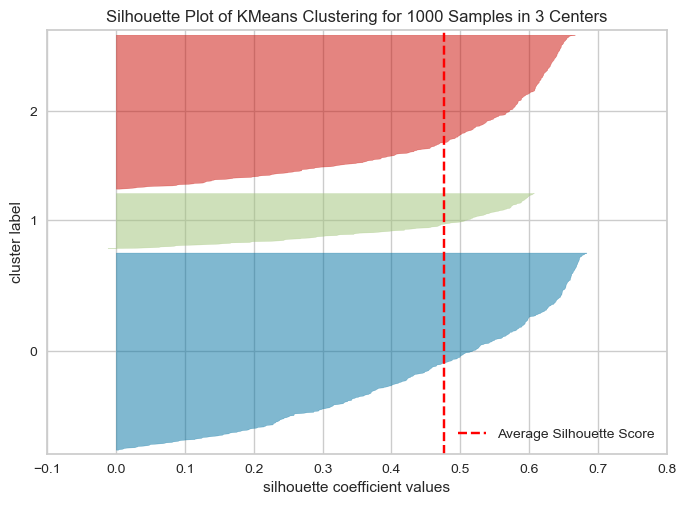

In [100]:
visualize_silhouette(x_emb,kmeans_model_word2vec,"Kmeans - word2vec")

In [101]:
data['target'] = pd.Series(word2vec_pred)
data

,review_body,stars,language,translated_review,target
0,Muy útil para el coche y con buena adherencia ...,5,es,Very useful for the car and with good magnetic...,2
1,Mejor de lo que pensaba!!! Muy cómodo. No sé n...,5,es,Better than I thought!!! Very comfortable. I d...,0
2,Por lo general funciona bien pero hay que pone...,4,es,It usually works fine but you have to put the ...,2
3,Me gusta que calienta y mantiene la temperatur...,2,es,I like that it heats and maintains the tempera...,0
4,LO MEJOR : Tener completa una de las series de...,3,es,THE BEST: Having one of the series from our ch...,2
...,...,...,...,...,...
995,Mochila made in china/taiwan con calidades muy...,2,es,Backpack made in China/Taiwan with very fair q...,0
996,Después de una hora y media o así de poner mús...,1,es,After an hour and a half or so of playing musi...,0
997,Necesitaba algo así para mi moto porque no ten...,5,es,I needed something like this for my motorcycle...,2
998,No quería creer lo que leía en el resto de com...,1,es,I didn't want to believe what I read in the re...,0


In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner.tuners import RandomSearch

In [19]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [21]:
df.drop(['RowNumber','CustomerId','Surname'],axis = 1, inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [23]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [24]:
df['Gender'].replace({'Male':1,'Female':0},inplace = True)

In [25]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [26]:
df1 = pd.get_dummies(df,dtype = int)
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [27]:
df1.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [28]:
df1['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [29]:
x = df1.drop(['Exited'],axis = 1)
y = df1['Exited']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2,stratify=y)

In [30]:
x_train.shape,x_test.shape

((8000, 12), (2000, 12))

In [31]:
normalizer = MinMaxScaler()
x_train_scaled = pd.DataFrame(normalizer.fit_transform(x_train),columns=x_train.columns)
x_test_scaled = pd.DataFrame(normalizer.transform(x_test),columns=x_test.columns)

In [32]:
x_train_scaled

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.806,1.0,0.527027,0.7,0.000000,0.000000,1.0,0.0,0.797394,1.0,0.0,0.0
1,0.778,1.0,0.189189,0.3,0.428413,0.000000,1.0,0.0,0.319879,0.0,1.0,0.0
2,0.810,0.0,0.256757,0.0,0.477648,0.333333,1.0,1.0,0.586979,0.0,1.0,0.0
3,0.422,1.0,0.256757,0.5,0.000000,0.333333,1.0,0.0,0.415448,1.0,0.0,0.0
4,0.684,1.0,0.418919,0.6,0.463700,0.333333,0.0,1.0,0.537358,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.676,0.0,0.229730,0.6,0.000000,0.000000,1.0,0.0,0.127396,0.0,0.0,1.0
7996,0.724,1.0,0.756757,0.5,0.000000,0.333333,0.0,0.0,0.757144,0.0,0.0,1.0
7997,0.634,0.0,0.256757,0.9,0.301135,0.333333,1.0,1.0,0.338648,1.0,0.0,0.0
7998,0.674,1.0,0.229730,0.8,0.423631,0.333333,1.0,0.0,0.111189,0.0,0.0,1.0


In [33]:
x_test_scaled

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.470,1.0,0.243243,0.7,0.000000,0.333333,1.0,0.0,0.471403,1.0,0.0,0.0
1,0.350,1.0,0.202703,0.4,0.549625,0.333333,0.0,0.0,0.275333,0.0,1.0,0.0
2,0.414,0.0,0.297297,0.4,0.000000,0.333333,0.0,1.0,0.527160,0.0,0.0,1.0
3,0.578,1.0,0.216216,0.5,0.584733,0.333333,0.0,0.0,0.169709,0.0,0.0,1.0
4,0.580,0.0,0.216216,0.3,0.326472,0.000000,1.0,1.0,0.842747,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.648,1.0,0.243243,0.2,0.648212,0.000000,0.0,1.0,0.137299,1.0,0.0,0.0
1996,0.568,1.0,0.256757,0.3,0.467444,0.333333,1.0,1.0,0.835184,0.0,1.0,0.0
1997,0.332,0.0,0.391892,0.9,0.538194,0.000000,0.0,0.0,0.748084,0.0,1.0,0.0
1998,0.678,1.0,0.283784,0.7,0.000000,0.333333,0.0,0.0,0.074535,1.0,0.0,0.0


In [34]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Input(shape = (12,)))

model.add(tf.keras.layers.Dense(units = 6,
                                activation='relu',
                                kernel_initializer='he_normal'))


model.add(tf.keras.layers.Dense(units = 10,
                                activation='relu',
                                kernel_initializer='he_uniform'))


model.add(tf.keras.layers.Dense(units = 1,
                                activation='sigmoid',
                                kernel_initializer='glorot_normal'))


model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Precision','Recall'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 479 (1.88 KB)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320 (1.25 KB)

In [36]:
history_obj = model.fit(x = x_train_scaled,
                        y = y_train,
                        batch_size = 100,
                        epochs = 100,
                        validation_data = (x_test_scaled,y_test),
                        validation_batch_size = 100)
history_obj

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - Precision: 0.2000 - Recall: 0.0178 - accuracy: 0.7854 - loss: 0.6164 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.5561
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7962 - loss: 0.5180 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.5050
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7962 - loss: 0.4969 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.4939
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.7962 - loss: 0.4880 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.7965 - val_loss: 0.4863
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy:

In [38]:
def visualizer(hist_obj,parameter):
    plt.figure(figsize = (8,6))
    train_param = hist_obj.history.get(parameter)
    val_param = hist_obj.history.get(f"val_{parameter}")
    epochs = history_obj.epoch

    sns.lineplot(x = epochs,y = train_param)
    sns.lineplot(x = epochs,y = val_param)


    plt.legend(labels = [parameter, f"val_{parameter}"])
    plt.xticks(ticks = epochs, labels = epochs,rotation = 30)
    plt.yticks(ticks = [i/100 for i in range(10,110,10)],labels = [i/100 for i in range(10,110,10)])
    plt.show()

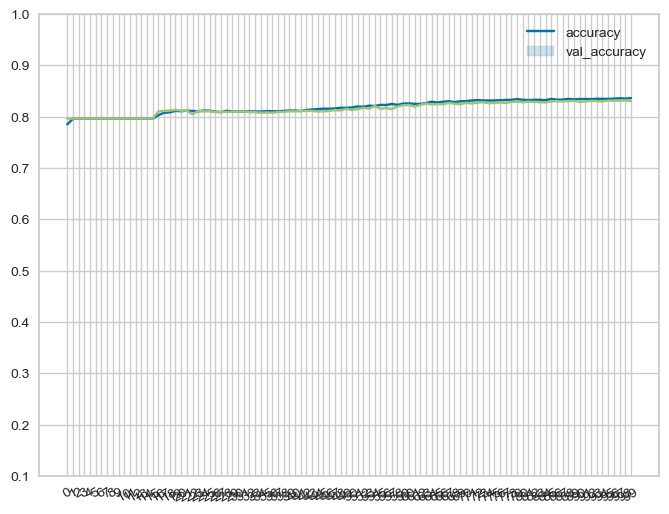

In [39]:
visualizer(history_obj,'accuracy')

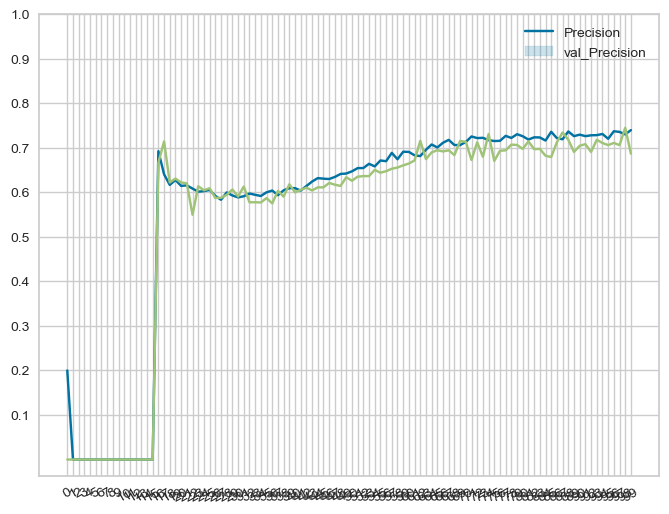

In [40]:
visualizer(history_obj,'Precision')

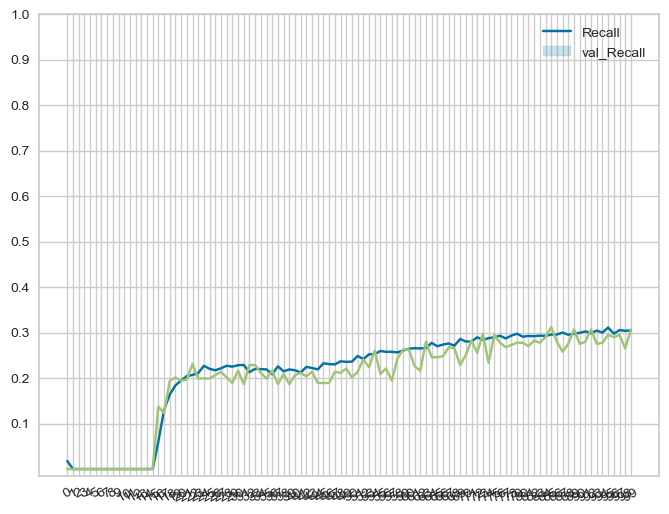

In [41]:
visualizer(history_obj,'Recall')

In [42]:
early_stopper = EarlyStopping(monitor = 'accuracy',patience=10)

In [43]:
history_obj2 = model.fit(x = x_train_scaled,
                         y = y_train,
                         batch_size = 100,
                         epochs = 100,
                         validation_data = (x_test_scaled,y_test),
                         validation_batch_size = 100,
                         callbacks = [early_stopper])

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Precision: 0.7151 - Recall: 0.3080 - accuracy: 0.8340 - loss: 0.4021 - val_Precision: 0.7011 - val_Recall: 0.2998 - val_accuracy: 0.8315 - val_loss: 0.4069
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.7326 - Recall: 0.3043 - accuracy: 0.8356 - loss: 0.4012 - val_Precision: 0.7195 - val_Recall: 0.2899 - val_accuracy: 0.8325 - val_loss: 0.4064
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.7294 - Recall: 0.3092 - accuracy: 0.8359 - loss: 0.4009 - val_Precision: 0.7195 - val_Recall: 0.2899 - val_accuracy: 0.8325 - val_loss: 0.4066
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - Precision: 0.7426 - Recall: 0.3080 - accuracy: 0.8372 - loss: 0.4007 - val_Precision: 0.7076 - val_Recall: 0.2973 - val_accuracy: 0.8320 - val_loss: 0.4062
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - Precision: 0.7274 - Recall: 0.3110 - accuracy: 0.8359 - loss: 0.4004 - val_Precision: 0.7448 - val_Recall: 0.26

In [44]:
def hypmodel(hyp):
    model = tf.keras.Sequential()

    # Input layer
    model.add(tf.keras.layers.Input(shape=(12,)))

    # Number of hidden layers (REALISTIC)
    for layer_num in range(
        hyp.Int('num_hidden_layers', min_value=1, max_value=5)
    ):
        model.add(
            tf.keras.layers.Dense(
                units=hyp.Int(
                    f'units_{layer_num}',
                    min_value=16,
                    max_value=128,
                    step=16
                ),
                activation=hyp.Choice(
                    f'activation_{layer_num}',
                    ['relu', 'elu']
                ),
                kernel_initializer=hyp.Choice(
                    f'kernel_init_{layer_num}',
                    ['he_normal', 'he_uniform']
                ),
                kernel_regularizer=tf.keras.regularizers.l2(
                    hyp.Float(f'l2_{layer_num}', 1e-5, 1e-2, sampling='log')
                )
            )
        )

        model.add(tf.keras.layers.BatchNormalization())

        model.add(
            tf.keras.layers.Dropout(
                hyp.Float(f'dropout_{layer_num}', 0.1, 0.5, step=0.1)
            )
        )

    # Output layer
    model.add(
        tf.keras.layers.Dense(
            1,
            activation='sigmoid',
            kernel_initializer='glorot_uniform'
        )
    )

    # Optimizer tuning
    lr = hyp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    return model


In [45]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    hypermodel=hypmodel,
    objective='val_accuracy',   # better than train accuracy
    max_trials=30,              # try 30 different models
    executions_per_trial=1,
    directory='kt_tuner',
    project_name='binary_classification_nn'
)


In [46]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
num_hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'elu'], 'ordered': False}
kernel_init_0 (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform'], 'ordered': False}
l2_0 (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
dropout_0 (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
learning_rate (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [47]:
tuner.search(
    x_train_scaled,
    y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)


Trial 30 Complete [00h 00m 23s]
val_accuracy: 0.8606250286102295

Best val_accuracy So Far: 0.8806250095367432
Total elapsed time: 00h 13m 01s


In [50]:
best_model = tuner.get_best_models()[0]

In [51]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 80)                  │          10,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 80)                  │             320 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 112)                 │           9,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 112)                 │             448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 112)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             113 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,577 (166.32 KB)

 Trainable params: 41,617 (162.57 KB)

 Non-trainable params: 960 (3.75 KB)

In [52]:
evaluation = best_model.evaluate(x = x_train_scaled, y = y_train, batch_size=100)

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8640 - loss: 0.3611 - precision: 0.7811 - recall: 0.4620 


In [53]:
evaluation = best_model.evaluate(x = x_test_scaled, y = y_test, batch_size=100)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8660 - loss: 0.3611 - precision: 0.7860 - recall: 0.4693 


In [55]:
import joblib

joblib.dump(best_model, "preprocessor.pkl")

['preprocessor.pkl']